# Visualizing Data - Plots

We can visualize continuous and categorical data using different `ggplot` functions and we will be exploring the following types of plots

- Categorical (1 variable)
- Categorical (>1 variables)
- Continuous (1 variable)
- Continuous (1 variable) with Categorical variable(s)
- Continuous (2 variables)
- Continuous (2 variables) with categorical variable(s)

---
## Data preparation

We will use an example dataset to illustrate the basic types of plots in `ggplot`

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# renaming column & changing data type of columns
data <- data %>% 
        rename(sex = male) %>% 
        mutate(sex = as.factor(sex),
               age = as.integer(age),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               )

# transforming any units
data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) %>% # mg/dL to mmol/L
        mutate(totChol = round(totChol/39, digits=1))     # mg/dL to mmol/L

head(data)

---
# Data Visualization (Pt 1)

- **Categorical (1 variable)**
- **Categorical (>1 variables)**
- Continuous (1 variable)
- Continuous (1 variable) with Categorical variable(s)
- Continuous (2 variables)
- Continuous (2 variables) with categorical variable(s)

## 1. Categorical data (1 variable)

We can plot categorical data for 1 variable in the following ways to compare the frequency or proportion of the different categories

![geom_bar_single.png](images/geom_bar_single.png)
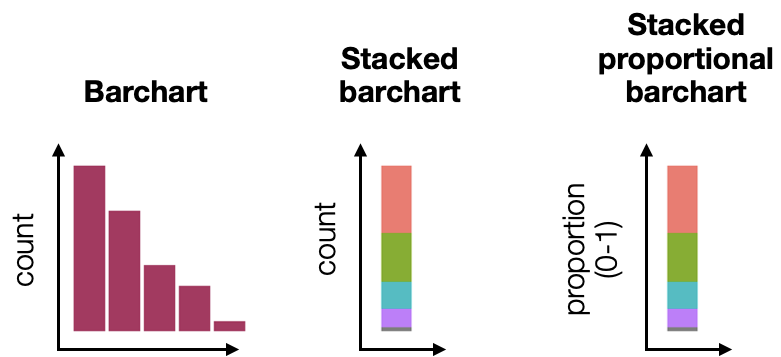

### 1.1. Barchart

A barchart allows us to compare the frequency counts of the different categories. We use the `geom_bar` function and specify the following
- `aes` in `ggplot`
  - `x` = categorical variable to plot
- `geom_bar`
  - `fill` = color of plot

In [ ]:
# Basic barchart

data %>% 
ggplot(aes(x=education)) + 
  geom_bar(fill="salmon")

### 1.2. Stacked barchart (1 variable)

A stacked barchart collapses all the categories to a single bar and the categories are mapped to different colors. The height of the bar is the total frequency count of all the categories. This is not commonly used as it is difficult to visually compare the proportions of different categories

To plot a stacked barchart, we specify the following
- `aes` in `ggplot`
  - `x = "all"` so collapse all categories to single bar
  - `fill` = categorical variable to color each category
- `geom_bar`
  - `position = "stack"` to stack the bars
  - `width`: optional width of bar

In [ ]:
# Stacked barchart for 1 categorical variable

data %>% 
ggplot(aes(x="all", fill=education)) +    # x="all", fill=categorical variable
  geom_bar(position="stack", width=0.2)   # position="stack"

### 1.3. Stacked proportional barchart (1 variable)

A stacked proportional barchart collapses all the categories to a single bar and the categories are mapped to different colors. The height of the bar is normalized to 1 (100%). This chart is useful for comparing the relative proportions of categories

To plot a stacked proportional barchart, we specify the following
- `aes` in `ggplot`
  - `x = "all"` so collapse all categories to single bar
  - `fill` = categorical variable to color each category
- `geom_bar`
  - `position = "fill"` to normalize the height to 1 (or 100%)
  - `width`: optional width of bar

In [ ]:
# Stacked proportional barchart for 1 categorical variable

data %>% 
ggplot(aes(x="all", fill=education)) +     # x="all", fill=categorical variable
  geom_bar(position="fill", width=0.2)     # position="fill" for proportional stack

---
## 2. Categorical data (2 variables)

For 2 categorical variables, we can visualize them in the following ways to compare the count/proportion of the first category broken down by the second category

![geom_bar_multiple.png](images/geom_bar_multiple.png)

### 2.1. Stacked barchart

To plot a stacked barchart for 2 categories, we specify the following
- `aes` in `ggplot`
  - `x` = first categorical variable on x-axis
  - `fill` = second categorical variable to breakdown each bar by color
- `geom_bar`
  - `position = "stack"` to stack the bars
  - `width`: optional width of bar
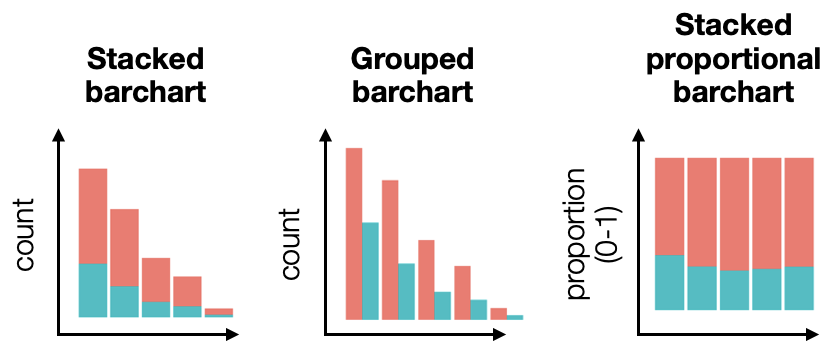

In [ ]:
# stacked barplot of education and prevalentHyp categorical variables

data %>% 
ggplot(aes(x=education, fill=prevalentHyp)) + 
  geom_bar()

### 2.2. Grouped barchart

Instead of stacking 2 categories, we can plot them side by side by specifying the following
- `aes` in `ggplot`
  - `x` = first categorical variable on x-axis
  - `fill` = second categorical variable to breakdown each bar by color
  
- `geom_bar`
  - `position = "dodge"` to plot the bars side-by-side
  - `width`: optional width of bar`

In [ ]:
# grouped barplot of education and prevalentHyp categorical variables

data %>% 
ggplot(aes(x=education, fill=prevalentHyp)) + 
  geom_bar(position="dodge")

### 2.3. Stacked proportional barchart

We can choose to plot the proportions of the variables for easier visual comparison. To plot a stacked proportional barchart for 2 categories, we specify the following
- `aes` in `ggplot`
  - `x` = first categorical variable on x-axis
  - `fill` = second categorical variable to breakdown each bar by color
- `geom_bar`
  - `position = "fill"` to normalize the height to 1 (or 100%)
  - `width`: optional width of bar

In [ ]:
# stacked proportional barplot of education and prevalentHyp categorical variables

data %>% 
ggplot(aes(x=education, fill=prevalentHyp)) + 
  geom_bar(position="fill")

### Categorical data (2 variables) using ```facet``` layer

Instead of plotting both categorical variables in one plot, we can split the plot of the first category by the second category using the `facet` layer. Here, we use the ```facet_grid``` layer
- We specify **categorical variables** for splitting a plot into subplots using the syntax ```row category ~ column category``` to indicate the layout of plots by row and column
- If we only have 1 category to split a plot in the ```facet_grid``` layer, we can specify ```.``` as a placeholder

![ggplot_facet.png](images/ggplot_facet.png)
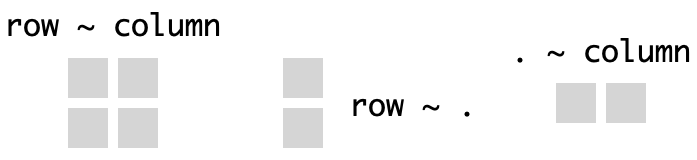

As an example, we will plot the `education` categorical variable as a barchart and split the plot according to the `prevalentHyp` category
- `aes` in `ggplot`
  - `x` = first categorical variable
- `geom_bar`
  - `fill`: optional color (default = black)
- `facet_grid`
  - `row ~ column` of each category to split

In [ ]:
# barplot of education faceted by prevalentHyp (column layout)

data %>% 
ggplot(aes(x=education)) + 
  geom_bar(fill="salmon") + 
  facet_grid(. ~ prevalentHyp)

In [ ]:
# barplot of education faceted by prevalentHyp (row layout)

data %>% 
ggplot(aes(x=education)) + 
  geom_bar(fill="salmon") + 
  facet_grid(prevalentHyp ~ .)

**Adding labels to `facet` plots**

The labels in the `facet` plots do not include the variable names by default so it can get confusing

We can specify the `labeller` option in `facet_grid` to add the categorical labels in the plots

```
labeller = labeller(.rows = label_both,
                    .cols = label_both)


In [ ]:
# Adding labels using the category names by the labeller option

data %>% 
ggplot(aes(x=education)) + 
  geom_bar(fill="salmon") + 
  facet_grid(. ~ prevalentHyp, 
             labeller = labeller(.rows = label_both, 
                                 .cols = label_both)) # labelling

If we want to override the labels taken from the categorical variables, we can explicitly substitute the labels. To do this, we specify the `labeller` option in `facet_grid` and indicate the new labels for each category in the following manner

```
labeller = labeller(category1 = c("old_label1" = "new_label1",
                                  "old_label2" = "new_label2",
                                   ...),
                    category2 = c("old_label1" = "new_label1",
                                  "old_label2" = "new_label2",
                                  ...),
                    ...
                    )               
                                  
```



For example, for `prevalentHyp` we want to label `0` as `Normal BP` and `1` as `Hypertensive`

In [ ]:
# Using explicit labels for prevalentHyp

data %>% 
ggplot(aes(x=education)) + 
  geom_bar(fill="salmon") + 
  facet_grid(. ~ prevalentHyp, 
             labeller = labeller(prevalentHyp=c("0"="Normal BP", 
                                                "1"="Hypertensive")))

---
## 2. Categorical data (>2 variables)

We can combine the different options (```fill``` and ```facet```) to compare 3 categorical variables. 

Let take an example where we interested in looking at the number/proportion of people with hypertension by their smoking status and gender
- We start with a barplot of `prevalentHyp`
  - `aes` in `ggplot`
    - `x = prevalentHyp`
    - `fill = prevalentHyp` to color the prevalentHyp categories
- We split the plot by `currentSmoker` and `sex`
  - `facet_grid`
    - `row ~ column categories`: `currentSmoker ~ sex`

In [ ]:
# barplot of prevalentHyp split by currentSmoker and sex

data %>% 
ggplot(aes(x=prevalentHyp, fill=prevalentHyp)) + 
  geom_bar() + 
  facet_grid(currentSmoker ~ sex, # row ~ column layout
             labeller = labeller(.rows = label_both, 
                                 .cols = label_both))

We can also stack the `prevalentHyp` categories into a single bar by setting `x = "all"` under the `aes` mapping in `ggplot`

In [ ]:
data %>% 
ggplot(aes(x="all", fill=prevalentHyp)) + # stack prevalentHyp
  geom_bar() + 
  facet_grid(currentSmoker ~ sex, 
             labeller = labeller(.rows = label_both, 
                                 .cols = label_both))

As the counts are hard to compare on stacked barcharts, we change it to show proportions by setting ```position="fill"``` in ```geom_bar```

In [ ]:
data %>% 
ggplot(aes(x="all", fill=prevalentHyp)) + 
  geom_bar(position="fill") + # change to proportion
  facet_grid(currentSmoker ~ sex, 
             labeller = labeller(.rows = label_both, 
                                 .cols = label_both))

As it is difficult to compare the proportions between the top and bottom rows, we can layout the plots horizontally by columns by extending the `row ~ column` syntax using the `+` operator to combine 2 categorical variables (e.g. `A` and `B`) in the row or column positions
- `. ~ A + B`: plot combinations of 2 categories (e.g. `A` and `B`) column-wise
- `A + B ~ .`: plot combinations of 2 categories (e.g. `A` and `B`) row-wise

![ggplot_facet_plus.png](images/ggplot_facet_plus.png)
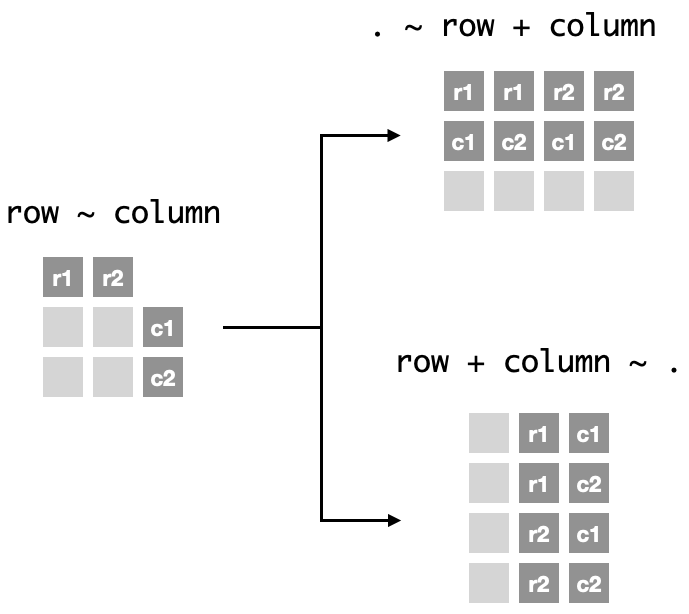

In [ ]:
# plot facets column-wise for combinations of sex and currentSmoker

data %>% 
ggplot(aes(x="all", fill=prevalentHyp)) + 
  geom_bar(position="fill") + 
  facet_grid(. ~ sex + currentSmoker, 
             labeller = labeller(.rows = label_both, 
                                 .cols = label_both))

---
# Data Visualization (Pt 2)

- Categorical (1 variable)
- Categorical (>1 variables)
- **Continuous (1 variable)**
- **Continuous (1 variable) with Categorical variable(s)**
- Continuous (2 variables)
- Continuous (2 variables) with categorical variable(s)

---
## 3. Continuous data (1 variable)

Continuous/quantitative data for 1 variable can be visualized in the follow ways
- **Histogram, density, box and violin plots** show the distribution of values
- **QQ plot** is a specialized plot to help assess if the values are normally distributed

![ggplot_distribution.png](images/ggplot_distribution.png)

### 3.1. Histogram

A histogram plots the frequency distribution of values
- Values are binned according to ranges in the x-axis
- The frequency of values in each bin is shown in the y-axis

To plot a histogram, we use the `geom_histogram` function and specify the following
- `aes` in `ggplot`
  - `x` = continuous variable
- `geom_histogram`
  - `binwidth`: option to indicate range of bin
  - `bins`: option to indicate number of bins
  - `fill`: optional color
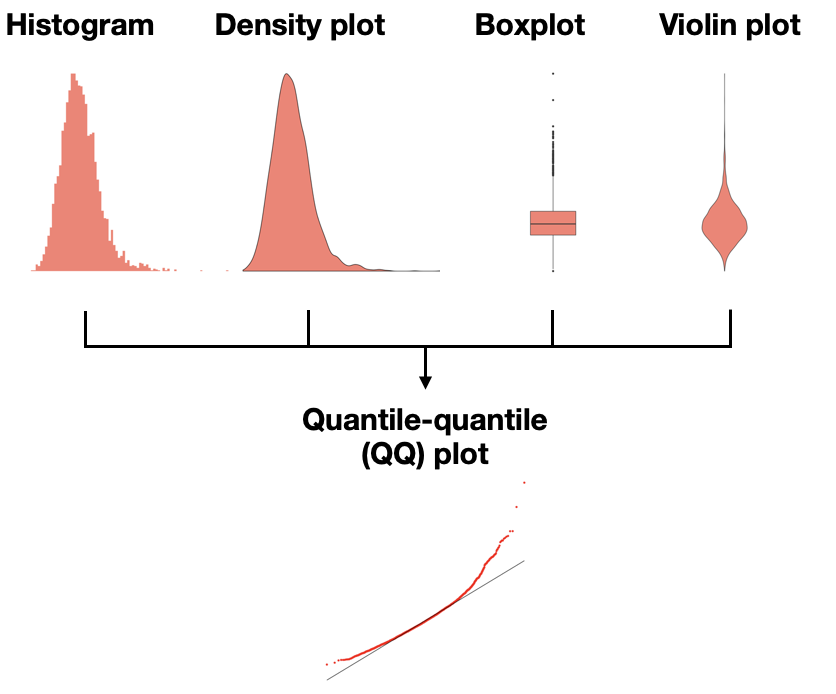

In [ ]:
# default bins = 30

data %>% 
ggplot(aes(x=BMI)) + 
  geom_histogram(fill="salmon")

In [ ]:
# changing the binwidth

data %>% 
ggplot(aes(x=BMI)) + 
  geom_histogram(binwidth=0.5, fill="salmon")

### 3.2. Density plot

A density plot smooths the distribution over continuous values by and is a useful alternative to a histogram. The total density (area under the curve) is normalized to 1.

To plot the density of the distribution, we use the `geom_density` function and specify the following
- `aes` in `ggplot`
  - `x`= continuous variable
- `geom_density`
  - `fill`: optional color

In [ ]:
data %>% 
ggplot(aes(x=BMI)) + 
  geom_density(fill="salmon")

### 3.3. Boxplot

A boxplot visualizes the distibution as a box with whiskers and shows several summary statistics
- `percentiles`: 25th, 50th (median), 75th
- `upper hinge`: 75th percentile + 1.5 x (75th - 25th percentile)
- `lower hinge`: 25th percentile - 1.5 x (75th - 25th percentile)
- `outliers`: values outside the upper/lower hinge

![boxplot.png](images/boxplot.png)

To plot a boxplot, we use the `geom_boxplot` function
- `aes` in `ggplot`
  - `x = all`: include all categories for the continuous variable
  - `y` = continuous variable
- `geom_boxplot`
  - `fill`: optional color
  - `width`: optional width of box

In [ ]:
# boxplot of BMI

data %>% 
ggplot(aes(x="all",y=BMI)) + 
  geom_boxplot(width=0.25)

### 3.4. Violin plot

A violin plot visualizes the distribution of values similar to a density plot but rotated vertically like a boxplot

To plot a violin plot, we use the `geom_violin` function and specify the following
- `aes` in `ggplot`
  - `x = all`: include all categories for the continuous variable
  - `y`= continuous variable
- `geom_violin`
  - `fill`: optional color
  - `width`: optional width of violin

In [ ]:
# violin plot of BMI

data %>% 
ggplot(aes(x="all", y=BMI)) + 
  geom_violin(width=0.25) 

### 3.5. Quantile-quantile (QQ) plot

A QQ plot is used to assess if the distribution of values follows a normal (Gaussian) distribution

![qqplot.png](images/qqplot.png)

From https://mgimond.github.io/ES218/Week06a.html
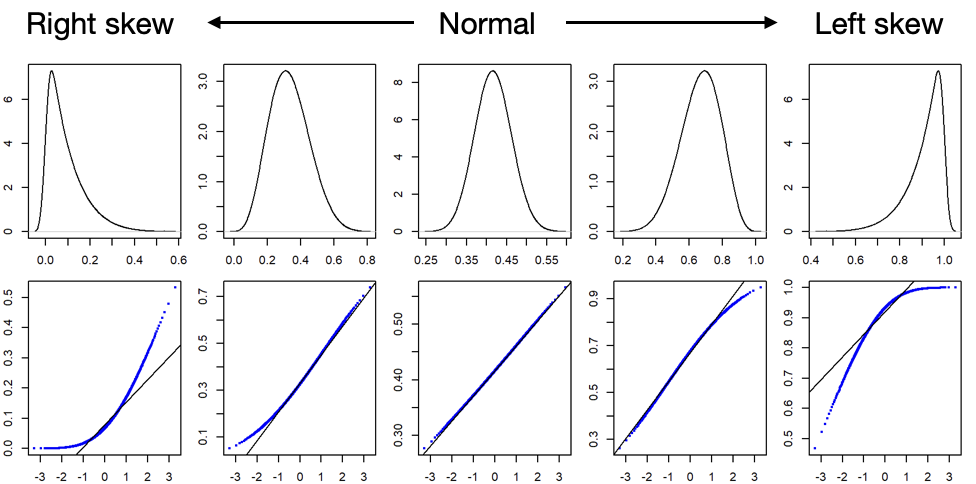

To demonstrate the QQ plot, we will first generate some samples from a ```normal``` distribution

In [ ]:
data_norm <- tibble(n=rnorm(1000)) # generate 1000 samples from normal distribution

head(data_norm)

We can see that the distribution of values  appears to be normally distributed from the ```histogram``` plot

In [ ]:
# histogram plot of n

data_norm %>% 
ggplot(aes(x=n)) + 
  geom_histogram(binwidth=.25)

We can assess if the distribution is normally distibuted using the QQ plot. It plots the quantile-quantile correlation between the theoretical normal distribution (x-axis) and the observed values (y-axis)

To plot the QQ plot, we use the `geom_qq` and `geom_qq_line` functions and specify the following
- `aes` in `ggplot`
  - `sample`= continuous variable
- `geom_qq` plots the quantile-quantile correlation
  - `color`: optional color of data points
- `geom_qq_line` plots the line that data should fall on if normally distributed
  - `color`: optional color of line


In [ ]:
# qq qplot of n

data_norm %>% 
ggplot(aes(sample=n)) + 
  geom_qq(color="red") + 
  geom_qq_line(color="blue")

We can see that most of the points fall on the line, consistent with the conclusion that the data is normally distributed

Let us examine the distribution of BMI in our dataset

In [ ]:
# histogram plot of BMI

data %>% 
ggplot(aes(x=BMI)) + 
  geom_histogram(binwidth=1)

In [ ]:
# qqplot of BMI

data %>% 
ggplot(aes(sample=BMI)) + 
  geom_qq(color="red") + 
  geom_qq_line(color="blue")

It appear the values at both lower and upper tails deviate from the theoretical line, suggesting that the BMI values are not normally distributed at the tails

---
## 4. Continuous data (1 variable) with categorical variable(s)

### 4.1. Histogram

We can visualize distributions of continuous data **grouped by** categorical variable(s) using 
- `fill` mapped to a category to color subsets of the distribution
- `facet` layer to split the distribution plots

As an example, we start with a histogram of `age` from our dataset

In [ ]:
data %>% 
ggplot(aes(x=age)) + 
  geom_histogram(binwidth=1)

We can specify ```fill``` in the mapping to show the distributions of the continuous values broken down by categories
- `aes` in `ggplot`
  - `x`= continuous variable
  - `fill`= categorical variable

In [ ]:
data %>% 
ggplot(aes(x=age, fill=prevalentHyp)) + 
  geom_histogram(binwidth=1)

We can also ```facet``` the plot to create subplots of the distribution by category
- `aes` in `ggplot`
  - `x`= continuous variable
  - `fill`= categorical variable
- `facet_grid`
  - `row ~ column`: categorical variable (row or column layout)

In [ ]:
# facet histogram plot by prevalentHyp (column layout)

data %>% 
ggplot(aes(x=age,fill=prevalentHyp)) + 
  geom_histogram(binwidth=1) + 
  facet_grid(.~prevalentHyp) # column

In [ ]:
# facet histogram plot by prevalentHyp (row) and currentSmoker (column)

data %>% 
ggplot(aes(x=age,fill=prevalentHyp)) + 
  geom_histogram(binwidth=1) + 
  facet_grid(prevalentHyp ~ currentSmoker) # row ~ column

### 4.2. Boxplot

We can visualize boxplots **grouped by** categorical variable(s) using 
- `x` mapped to the categorical variable
- `facet` layer to split by the categorical variable(s)

We will illustrate these starting with a boxplot of `sysBP` from the dataset

In [ ]:
# boxplot of age with all categories specified

data %>% 
ggplot(aes(x="all",y=sysBP)) + # x mapped to all categories
  geom_boxplot(width=0.25)

To show the different boxplots for each category, we set the ```x``` mapping to the ```categorical variable``` instead of ```"all"```
- `aes` in `ggplot`
  - `x`= categorical variable
  - `y`= continuous variable for boxplot

In [ ]:
# boxplot of sysBP grouped by sex

data %>% 
ggplot(aes(x=sex,y=sysBP)) + 
  geom_boxplot(width=0.25)

For additional categories, we can also ```facet``` the boxplot
- `aes` in `ggplot`
  - `x`= categorical variable
  - `y`= continuous variable for boxplot
- `facet_grid`
  - `row ~ column`: additional categorical variable(s) (row or column layout)

In [ ]:
# boxplot of sysBP grouped by sex and faceted by diabetes

data %>% 
ggplot(aes(x=sex,y=sysBP)) + 
  geom_boxplot() + 
  facet_grid(.~diabetes) # facet by diabetes in column layout

---
# Data Visualization (Pt 3)

- Categorical (1 variable)
- Categorical (>1 variables)
- Continuous (1 variable)
- Continuous (1 variable) with categorical variable(s)
- **Continuous (2 variables)**
- **Continuous (2 variables) with categorical variable(s)**

## 5. Continuous (2 variables)

The relationship between 2 continuous variables can be visualized with a scatterplot

![ggplot_point.png](images/ggplot_point.png)

To plot a scatterplot, we use the `geom_point` function and specify the following
- `aes` in `ggplot`
  - `x`= continuous variable 1
  - `y`= continuous variable 2
- `geom_point`
  - `color`: optional color
  - `size`: optional size
  - `shape`: optional shape
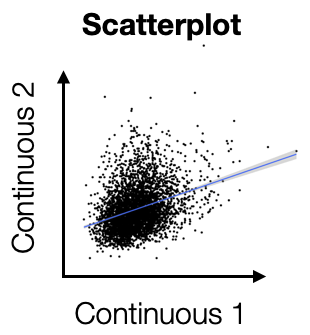

In [ ]:
# scatterplot of BMI and sysBP

data %>% 
ggplot(aes(x=BMI, y=sysBP)) + 
  geom_point()

We can add a ```geom_smooth``` function to draw a linear regression line to highlight any possible linear relationship between the 2 continuous variables
- `aes` in `ggplot`
  - `x`= continuous variable 1
  - `y`= continuous variable 2
- `geom_point` to plot the x,y points
- `geom_smooth` to plot the regression line
  - `method`: set to `lm` for linear line


In [ ]:
# scatterplot of BMI and sysBP with linear regression line

data %>% 
ggplot(aes(x=BMI, y=sysBP)) + 
  geom_point() + 
  geom_smooth(method="lm")

## 6. Continuous data (2 variables) with categorical variable(s)

We can visualize scatterplots **grouped by** categorical variable(s) using 
- `color`,`size` or `shape` mapped to a category
- `facet` layer to split the distribution plots

### 6.1. Mapping categories to points

We can use ```color```, ```size```, ```shape``` in ```aes``` to map a categorical variable to the scatterplot
- `aes` in `ggplot`
  - `color`= categorical variable
  - `size`= categorical variable
  - `shape`= categorical variable
- `geom_point` to plot the x,y points

In [ ]:
# scatterplot grouped by sex using color

data %>% 
ggplot(aes(x=BMI, y=sysBP, color=sex)) + 
  geom_point()

In [ ]:
# scatterplot grouped by sex using size

data %>% 
ggplot(aes(x=BMI, y=sysBP, size=sex)) + 
  geom_point()

In [ ]:
# scatterplot grouped by sex using shape

data %>% 
ggplot(aes(x=BMI, y=sysBP, shape=sex)) + 
  geom_point()

As you can see, the ```color``` mapping appears to be more effective in highlight the different categories in the scatterplot

### 6.2. Faceting

We can also ```facet``` the scatterplot to create subplots by category
- `aes` in `ggplot`
  - `x`= continuous variable 1
  - `y`= continuous variable 2
- `facet_grid`
  - `row ~ column`: categorical variable(s) (row or column layout)

In [ ]:
# scatterplot of BMI and sysBP faceted by prevalentHyp

data %>% 
ggplot(aes(x=BMI, y=sysBP)) + 
  geom_point() + 
  facet_grid(.~prevalentHyp) # prevalentHyp column layout

In [ ]:
# scatterplot of BMI and sysBP faceted by sex and prevalentHyp

data %>% 
ggplot(aes(x=BMI, y=sysBP)) + 
  geom_point() +
  facet_grid(sex~prevalentHyp) # sex (row) and prevalentHyp (column)

---
# Exercise - Visualizing Data

We will use the Framingham heart study dataset

In [ ]:
library(tidyverse)

# load data
data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# renaming column & changing data type of columns
data <- data %>% 
        rename(sex = male) %>% 
        mutate(sex = as.factor(sex),
               age = as.integer(age),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               )

# transforming any units
data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) %>% # mg/dL to mmol/L
        mutate(totChol = round(totChol/39, digits=1))     # mg/dL to mmol/L

head(data)

## Part 1

Plot a graph to compare the different proportions of patients with ```TenYearCHD``` among males and females

In [ ]:
# start here

In [ ]:
# solution

data %>% 
ggplot(aes(x=TenYearCHD, fill=sex)) +
  geom_bar(position="fill")

## Part 2

Plot a graph to show the distribution of ages in patients with and without chronic heart disease using `TenYearCHD`

In [ ]:
# start here

In [ ]:
# solution

data %>% 
ggplot(aes(x=age, fill=TenYearCHD)) +
  geom_histogram(binwidth=1)

## Part 3

Evaluate if the distribution of the systolic BP is likely to be normal

In [ ]:
# start here

In [ ]:
# solution

data %>% 
ggplot(aes(sample=sysBP)) + 
  geom_qq(color="red") +
  geom_qq_line()

## Part 4

Plot a boxplot to compare the distribution of total cholesterol between patients with and without chronic heart disease using `TenYearCHD` 

In [ ]:
# start here

In [ ]:
# solution

data %>% 
ggplot(aes(x=TenYearCHD, y=totChol)) +
  geom_boxplot()

## Part 5

Plot a graph to examine the relationship between BMI and systolic BP, then compare this relationship among male and female patients using side-by-side plots by adding a linear regression line

In [ ]:
# start here for first section

In [ ]:
# solution

data %>% 
ggplot(aes(x=BMI, y=sysBP)) +
  geom_point()

In [ ]:
# start here for second section

In [ ]:
# solution

data %>% 
ggplot(aes(x=BMI, y=sysBP)) +
  geom_point() +
  geom_smooth(method="lm") +
  facet_grid(.~sex)